In [14]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

In [2]:
from io import StringIO
import io
import os.path
import glob
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#from keras.utils import to_categorical

In [1]:
import jieba
from jieba import analyse
import string
#from gensim.models.word2vec import Word2Vec
#import word2vec
import logging
from gensim.models import word2vec
#https://github.com/danielfrg/word2vec/blob/master/examples/word2vec.ipynb
#https://anaconda.org/anaconda/word2vec

C:\Users\b1194\AppData\Local\Continuum\anaconda3\envs\Data_Science\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [9]:
def extract_text_by_page(pdf_path):
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=True):
            resource_manager = PDFResourceManager()
            #codec = 'utf-8'
            fake_file_handle = io.StringIO()
            converter = TextConverter(resource_manager, fake_file_handle)
            #converter = TextConverter(resource_manager, codec, fake_file_handle)
            page_interpreter = PDFPageInterpreter(resource_manager, converter)
            page_interpreter.process_page(page)

            text = fake_file_handle.getvalue()
            print(text)
            yield text
            # close open handles
            converter.close()
            fake_file_handle.close()


def export_as_csv(pdf_path, csv_path, isNew):
    #filename = os.path.splitext(os.path.basename(pdf_path))[0]
    SliceLen = 150 #多少字切一次
    global seqNo
    if isNew:
        opMode = "w"
    else:
        opMode = 'a'
    with open(csv_path, opMode, newline='', encoding='utf-8-sig') as csv_file:
    # with open(csv_path, opMode, newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        #writer = csv.writer(csv_file, delimiter=';')
        PageNo = 0
        Segment = 0
        mDate = ""
        if isNew:
            # write fieldName into CSV head
            writer.writerow(['SeqNo', '屆次', '日期', 'FileName', 'PageNo', 'Segment', '財政','Text'])
        pdfName = os.path.basename(pdf_path)
        fnList = pdfName.split("-")
        termNo = fnList[0] + "屆" + fnList[1] + "次"
        #for page in extract_pdf_content(pdf_path):
        for page in extract_text_by_page(pdf_path):
            PageNo += 1 
            n = len(page) // SliceLen
            text = page[0:SliceLen -1]
            dateStart = text.find("中華民國")
            if dateStart != -1:
                dateEnd = text.find("日",dateStart,dateStart+30)
                if dateEnd != -1:
                    mDate = text[dateStart+4:dateEnd].strip()
                    mY = int(mDate.split("年")[0]) + 1911
                    mDate = mDate.replace("年","-").replace("月","-").replace(" ","")
                    mDate = str(mY) + "-" + mDate.split("-")[1] + "-" + mDate.split("-")[2]
                    
            for i in range(0,n):
                strBegin =  i * SliceLen
                strEnd = (i+1) * SliceLen -1
                Segment = i + 1
                text = page[strBegin:strEnd]
                seqNo += 1
                #print("text before split----------------------------")
                writer.writerow([seqNo, termNo, mDate, pdfName, PageNo, Segment, "", text])

# PDF轉EXCEL

In [10]:
#pdf_path = "D://CIS PDF/"
pdf_path = "D://python_kcc/pdf"
pdfs = glob.glob("{}/*.pdf".format(pdf_path))
seqNo = 0
newFlag = True
csv_path = "export_csv/out.csv"
for pdf in pdfs:
    export_as_csv(pdf, csv_path, newFlag)
    newFlag = False

8967    一、第 1 屆第 1 次定期大會第 27 次會議 （中華民國 100 年 5 月 16 日上午 8 時分）  主席（許議長崑源）： 向大會報告，今天上午的議程是市政總質詢，第一位請蘇議員炎城開始質詢。 蘇議員炎城：  大會主席許議長、陳市長、各位局長、各位議員同仁以及記者先生、小姐，大家好。高雄縣市已經合併，陳市長一直強調「無縫接軌」，到目前為止，在各方面的交接、運作，大致上還算不錯；但是有一小部分，高雄縣、高雄市留下來的法令規範有不一樣的地方， 要如何做處理，我相信還有其他的問題，大家要再研議、協商，看要如何修改。高雄縣市合併以後， 長期照護協會要何去何從，我們都知道高雄市的法令規範和高雄縣的總是有一些差距，在這種情況下，有差距的部分要如何磨合、協調，才能在短期間進入狀況，本席在這裡有一些事情要請教各位局長們。 社會局局長，原高雄縣老人安養機構已面對一些問題，我在這裡和局長一起來研究，高雄市安養機構共有幾家？其中原高雄縣佔的比例是多少？ 安養機構可以凸顯一件事情，凡人都會年老，要把這些長輩送到哪裡， 這是大家關心的，在座的各位，總有一天也會面臨到這個問題，在整體的情況下，給予長輩們好的福利、提升品質，我相信這是大家的期待， 尤其這些長輩辛辛苦苦建立這個社會， 也付出他們的青春、時間、專業， 為我們的社會、政府、國家來努力，因為年紀也大了，他們一定會面臨到這些問題。 社會局蘇局長，安養機構共有幾家，你應該知道吧！高雄市共有幾家？ 高雄市應該比較知道，高雄縣有幾家？你知道嗎？  主席（許議長崑源）： 社會局局長，請答覆。 社會局蘇局長麗瓊： 原高雄縣有 58 家。 蘇議員炎城：  
8968    高雄市呢？ 社會局蘇局長麗瓊： 高雄市大概有 85 家。 蘇議員炎城：  高雄市有這麼多嗎？  社會局蘇局長麗瓊： 高雄市有 85 家，高雄縣有 58 家，這 58 家包括…。 蘇議員炎城：  48 家吧！  社會局蘇局長麗瓊： 58 家。 蘇議員炎城：  58 家。 社會局蘇局長麗瓊： 原高雄縣的 58 家，包括原來的老人公寓和…。 蘇議員炎城：  沒關係，現在要說的，是他們所面對的問題…。你先請坐，等我說完， 你再一併做答覆。 請看第二張投影片， 衛生署 100 年 4 月中旬推出長期照護服務草案， 簡稱為「長照服務法」，其中第 50 條明訂：「

# 分詞_去除停止詞

In [12]:
# 載入停止詞詞庫
stopword_set = set()
with open('dict/stop_word.txt','r', encoding='utf-8') as stopwords:
    for stopword in stopwords:
        stopword_set.add(stopword.strip('\n'))

In [21]:
jieba.set_dictionary("dict/dict.big.txt")
jieba.load_userdict("dict/CIS_Dict.txt")
#jieba.analyse.set_stop_words("dict/stop_word.txt")

csvInPath = "export_csv/out.csv"
csvOutPath = "export_csv/out2_cut_stopword.csv"

str_de = "===================================================================\n"

csvIn = open(csvInPath , newline='', encoding='utf-8-sig')
rowlists = csv.reader(csvIn)
csvOut = open(csvOutPath, "w", newline='', encoding='utf-8-sig')
writer = csv.writer(csvOut)

for row in rowlists:
    str1 = row[7].replace("\r\n", "").replace(" ", "").replace("：", "").replace("，", "").replace("！", "").replace("、", "").replace("。", "")
    str1 = str1.replace("「", "").replace("」", "").replace("？", "").replace("\"","")
    
    strCut = jieba.cut(str1) #分詞
    #print("{}strCut:{}{}".format(str_de,strCut,str_de)) #測試
    
    #去除停止詞：以list comprehension方式
    str_list = [word for word in strCut if word not in stopword_set] 
    
    #list轉喚回字串
    strout = " ".join(str_list)
    
    #寫回CSV檔
    writer.writerow([row[0], row[1], row[2],row[3], row[4], row[5],row[6],strout])
        
csvOut.close()
csvIn.close()

Building prefix dict from D:\python_kcc\dict\dict.big.txt ...
I1104 16:29:52.772334 15572 __init__.py:111] Building prefix dict from D:\python_kcc\dict\dict.big.txt ...
Loading model from cache C:\Users\b1194\AppData\Local\Temp\jieba.u9a1c961e2028b38db4173ee3c9b16c71.cache
I1104 16:29:52.774296 15572 __init__.py:131] Loading model from cache C:\Users\b1194\AppData\Local\Temp\jieba.u9a1c961e2028b38db4173ee3c9b16c71.cache
Loading model cost 0.966 seconds.
I1104 16:29:53.740561 15572 __init__.py:163] Loading model cost 0.966 seconds.
Prefix dict has been built succesfully.
I1104 16:29:53.740561 15572 __init__.py:164] Prefix dict has been built succesfully.


In [22]:
words = pd.read_csv("export_csv/out2_cut_stopword.csv")

In [24]:
words.head(5)

,SeqNo,屆次,日期,FileName,PageNo,Segment,財政,Text
0,1,1屆1次,2011-5-16,1-1-6-cut-ok.pdf,1,1,NaN,8967    屆 次 定期大會 27 次 會議 中華民國 100 年 月 16 日 ...
1,2,1屆1次,2011-5-16,1-1-6-cut-ok.pdf,1,2,NaN,小姐 高雄縣 市 已經 合併 陳市長 一直 強調 無縫接軌 目前為止 方面 交接 運作 大致...
2,3,1屆1次,2011-5-16,1-1-6-cut-ok.pdf,1,3,NaN,雄市 法令規範 高雄縣 總是 差距 這種 情況 差距 部分 磨合 協調 短 期間 進入 狀況...
3,4,1屆1次,2011-5-16,1-1-6-cut-ok.pdf,1,4,NaN,凡人 會 年老 長輩 送到 關心 在座 總 一天 會 面臨 問題 整體 情況 給予 長輩 們...
4,5,1屆1次,2011-5-16,1-1-6-cut-ok.pdf,2,1,NaN,8968 高雄市 社會局 蘇 局長 麗瓊 高雄市 大概 85 家 蘇議員炎城 高雄市 社會局...


In [25]:
words_test = words['Text']

In [26]:
words_test.head(5)

0    8967    屆 次 定期大會 27 次 會議 中華民國 100 年 月 16 日 ...
1    小姐 高雄縣 市 已經 合併 陳市長 一直 強調 無縫接軌 目前為止 方面 交接 運作 大致...
2    雄市 法令規範 高雄縣 總是 差距 這種 情況 差距 部分 磨合 協調 短 期間 進入 狀況...
3    凡人 會 年老 長輩 送到 關心 在座 總 一天 會 面臨 問題 整體 情況 給予 長輩 們...
4    8968 高雄市 社會局 蘇 局長 麗瓊 高雄市 大概 85 家 蘇議員炎城 高雄市 社會局...
Name: Text, dtype: object

# Word2vec 去除stop words

In [4]:
#把text欄位取出寫到txt檔
#因為直接用dataframe沒有反應
#check : word2vec一定要要檔案?
words = pd.read_csv("export_csv/out2_cut_stopword.csv")
words_test = words['Text']
words_test.to_csv(r'export_csv/out2_cut_stopword.txt', header=None, index=None, sep=' ', mode='a')

C:\Users\b1194\AppData\Local\Continuum\anaconda3\envs\Data_Science\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


# Train word2vec
https://nbviewer.jupyter.org/github/danielfrg/word2vec/blob/master/examples/word2vec.ipynb

In [5]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = word2vec.LineSentence("export_csv/out2_cut_stopword.txt")
# model = word2vec.Word2Vec(sentences, size=12, workers=2, window=2, min_count=15, iter=1)
model = word2vec.Word2Vec(sentences, size=250, workers=3, window=5, min_count=10, iter=5)

2019-06-05 15:11:36,445 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-06-05 15:11:36,446 : INFO : collecting all words and their counts
2019-06-05 15:11:36,446 : WARNING : this function is deprecated, use smart_open.open instead
2019-06-05 15:11:36,447 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-05 15:11:36,548 : INFO : PROGRESS: at sentence #10000, processed 429253 words, keeping 28197 word types
2019-06-05 15:11:36,660 : INFO : PROGRESS: at sentence #20000, processed 859715 words, keeping 28197 word types
2019-06-05 15:11:36,761 : INFO : PROGRESS: at sentence #30000, processed 1289081 words, keeping 28197 word types
2019-06-05 15:11:36,844 : INFO : PROGRESS: at sentence #40000, processed 1719019 words, keeping 28197 word types
2019-06-05 15:11:36,948 : INFO : PROGRESS: at sentence #50000, processed 2148798 words, keeping 28197 word types
2019-06-05 15:11:37,045 : INFO : PROGRESS: at sentence #60000, proc

In [18]:
model.wv.save_word2vec_format('model.txt', binary=False)

2019-05-29 09:18:59,896 : INFO : storing 28197x250 projection weights into model.txt
2019-05-29 09:18:59,897 : WARNING : this function is deprecated, use smart_open.open instead


In [14]:
len(model.wv.get_vector('先生'))

250

# 運用訓練好的model
### https://stackoverflow.com/questions/52126539/using-pretrained-gensim-word2vec-embedding-in-keras
### https://stackoverflow.com/questions/48677077/how-do-i-create-a-keras-embedding-layer-from-a-pre-trained-word-embedding-datase
### https://stackoverflow.com/questions/51819213/keras-function-api-setting-weight-manually-to-a-layer/51819438#51819438

### https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [19]:
# load embedding as a dict
def load_embedding(filename):
    # load embedding into memory, skip first line
    file = open(filename,'rb')
    lines = file.readlines()[1:]
    file.close()
    # create a map of words to vectors
    embedding = dict()
    for line in lines:
        parts = line.split()
        # key is string word, value is numpy array for vector
        embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
    return embedding

# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = embedding.get(word)
    return weight_matrix

In [20]:
# load embedding from file
raw_embedding = load_embedding('model.txt')
# get vectors in the right order
#embedding_vectors = get_weight_matrix(raw_embedding, t.word_index)

In [21]:
type(raw_embedding)

dict

# 訓練集資料處理

In [37]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#計算最大長度
MAX_NB_WORDS = words_test.map(len).max()


In [57]:
texts = words_test[1]
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [ ]:
def subtract_custom_value(x, custom_value):
...     return x-custom_value

series.apply(subtract_custom_value, args=(5,))

In [63]:
df = pd.DataFrame({'sentences': ['This is a very good site. I will recommend it to others.', 'Can you please give me a call at 9983938428. have issues with the listings.', 'good work! keep it up']})
df['tokenized_sents'] = df.apply(lambda row: tokenizer.fit_on_texts(row['sentences']), axis=1)

In [74]:
words['Text'][:5]

0    8967    屆 次 定期大會 27 次 會議 中華民國 100 年 月 16 日 ...
1    小姐 高雄縣 市 已經 合併 陳市長 一直 強調 無縫接軌 目前為止 方面 交接 運作 大致...
2    雄市 法令規範 高雄縣 總是 差距 這種 情況 差距 部分 磨合 協調 短 期間 進入 狀況...
3    凡人 會 年老 長輩 送到 關心 在座 總 一天 會 面臨 問題 整體 情況 給予 長輩 們...
4    8968 高雄市 社會局 蘇 局長 麗瓊 高雄市 大概 85 家 蘇議員炎城 高雄市 社會局...
Name: Text, dtype: object

In [87]:
#lambda 測試
frame = pd.DataFrame(np.random.randint(0,10,(4,4)),index=list('abcd'),columns=list('ABCD'))
frame['E'] = frame['D'].apply(lambda row:np.sqrt(row))
frame

,A,B,C,D,E
a,5,2,8,1,1.000000
b,7,3,0,0,0.000000
c,2,6,4,2,1.414214
d,4,6,1,5,2.236068


In [136]:
#把words['Text']一次tokenized
#參考：https://stackoverflow.com/questions/33098040/how-to-use-word-tokenize-in-data-framexu
#108.05.29 不知為何不work
words['tokenized_sents'] = words['Text'][1:5].apply(lambda row:tokenizer.fit_on_texts(row))

In [138]:
words['tokenized_sents'][1:5]

1    None
2    None
3    None
4    None
Name: tokenized_sents, dtype: object

In [135]:
for row in words['Text'][1:5]:
    print(row)

小姐 高雄縣 市 已經 合併 陳市長 一直 強調 無縫接軌 目前為止 方面 交接 運作 大致 算 不錯 一小部分 高雄縣 高雄市 留下來 法令規範 地方 做 處理 相信 問題 研議 協商 修改 高雄 縣市合併 以後 長期照護 協會 何去何從 知道
雄市 法令規範 高雄縣 總是 差距 這種 情況 差距 部分 磨合 協調 短 期間 進入 狀況 本席 事情 請教 局長 社會 局局長 原 高雄縣 老 安養 機構 面對 問題 局長 起來 研究 高雄市 安養 機構 共有 幾家 原 高雄縣 佔 比例 安養 機構 凸顯 一件 事情
凡人 會 年老 長輩 送到 關心 在座 總 一天 會 面臨 問題 整體 情況 給予 長輩 們好 福利 提升 品質 相信 期待 尤其 長輩 辛辛苦苦 建立 社會 付出 青春 時間 專業 社會 政府 國家 努力 年紀 一定 會 面臨
8968 高雄市 社會局 蘇 局長 麗瓊 高雄市 大概 85 家 蘇議員炎城 高雄市 社會局 蘇 局長 麗瓊 高雄市 85 家 高雄縣 58 家 58 家 包括 … 蘇議員炎城 48 家 社會局 蘇 局長 麗瓊 58 家 蘇議員炎城 58 家 社會局 蘇 局長


In [130]:
word_lambda_test = words['Text'][1]
str1= words['Text'].apply(lambda row:tokenizer.fit_on_texts(row))

In [131]:
type(str1)

pandas.core.series.Series

In [42]:
tokenizer = Tokenizer(nb_words = MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

C:\Users\b1194\AppData\Local\Continuum\anaconda3\envs\Data_Science\lib\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [45]:
word_index = tokenizer.word_index
print ( ' Found %s unique tokens. '  %  len (word_index))

 Found 68 unique tokens. 


# 預測 by 主任
#### 已修改成類別 by CY

In [3]:
import csv
import logging
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional,GlobalMaxPool1D  #做bidir LSTM
from keras.callbacks import EarlyStopping
from keras import regularizers #正規化，減緩overfitting
from numpy import asarray 
from numpy import zeros


Using TensorFlow backend.


In [4]:
def sample_data(data,sample_ratio=0.8,topK=10,column=""):
    """
    input:(1)data：要抽樣的資料。
          (2)sample_ratio：抽樣的比率
          (3)topK：顯示筆數
          (4)column：指定欄位名稱。
    output:回傳
           (1)sample (DataFrame):抽樣的資料。
           (2)rest   (DataFrame):沒被抽中的資料。
    """
    if not str(type(data)).find("DataFrame"):
        print("================        CP1           ================")
        data = pd.DataFrame(data)
    sample_num = int(len(data)*sample_ratio)
    
    
    if str(column) is not "":
        print("================        CP2           ================")
        data = data[str(column)]
        
    sample = data.sample(sample_num).sort_index(axis=0, ascending=True)
    rest = data.loc[~data.index.isin(sample.index)].sort_index(axis=0, ascending=True)

    print("訓練資料共抽樣{sample_n}筆，前{top}筆：\n{sample_d}\n".format(sample_n=len(sample),top=topK,sample_d=sample[:topK]))
    print("剩餘資料共{rest_n}筆，前{top}筆：\n{rest_d}\n".format(rest_n=(len(data)-len(sample)),top=topK,rest_d=rest[:topK]))
    
    return sample,rest

In [5]:
data_path = r"D:\python_kcc\code_from_O\Data\\"
data_pd = pd.read_csv(data_path+"2-CIS150_Only3rd_Seg.csv")

In [6]:
data_pd

,類別,財政,Text
0,6,1,造成 髒 亂 方便 影響 居民 生活品質 下一張 這是 大型 公園 屬於 苗圃 用地 剛說 ...
1,6,1,地方 這是 原民會 一個 工程 地方 施作 地方 原住民 事務 委員會 范 主任委員 織欽 ...
2,6,0,請 區公所 處理 伊 斯坦 貝雅 夫 正福 議員 是不是 一下 山青 意見 看下 一張 上面...
3,6,1,公園 處理 工務局 長 主席 許議長崑源 工務局 長 請答 覆 工務局 吳 局長 宏課 現在...
4,4,0,開通 紓解 交通 交通 阻塞 大社 仁武 高速公路 紓解 主要 那條 道路 帶動 大社 仁武...
5,4,0,觀光 纜車 再來 交通 原 高雄縣 交通 問題 觀光 帶動 交通 發展 包括 水利 問題 四...
6,5,0,知道 2025 年 這種 目標 每個 城市 情境 條件 情境 是因為 重工業 煉鋼廠 發電廠...
7,5,1,送給 買會貴 一點 這是 調適 基金 交換 本來 就要 幫忙 做 幫忙 做 補償 以前 觀念...
8,6,1,希望 市長 工務局 長 全面 檢討 世貿 流行音樂 中心 總 圖書館 趁現在 還能 更改 時...
9,5,1,崑 源 請 環保局 長 先答 覆 環境保護局 李 局長 穆生 從吳 議員 結論 打造 一個 ...


In [68]:
train,test = sample_data(data_pd)

訓練資料共抽樣1600筆，前10筆：
    類別  財政                                               Text
0    6   1  造成 髒 亂 方便 影響 居民 生活品質 下一張 這是 大型 公園 屬於 苗圃 用地 剛說 ...
1    6   1  地方 這是 原民會 一個 工程 地方 施作 地方 原住民 事務 委員會 范 主任委員 織欽 ...
2    6   0  請 區公所 處理 伊 斯坦 貝雅 夫 正福 議員 是不是 一下 山青 意見 看下 一張 上面...
3    6   1  公園 處理 工務局 長 主席 許議長崑源 工務局 長 請答 覆 工務局 吳 局長 宏課 現在...
5    4   0  觀光 纜車 再來 交通 原 高雄縣 交通 問題 觀光 帶動 交通 發展 包括 水利 問題 四...
7    5   1  送給 買會貴 一點 這是 調適 基金 交換 本來 就要 幫忙 做 幫忙 做 補償 以前 觀念...
8    6   1  希望 市長 工務局 長 全面 檢討 世貿 流行音樂 中心 總 圖書館 趁現在 還能 更改 時...
9    5   1  崑 源 請 環保局 長 先答 覆 環境保護局 李 局長 穆生 從吳 議員 結論 打造 一個 ...
11   5   1  移 撥 警察局 派出所 知道 是不是 經費 的關 係 覺得 巡 守隊 一個 重要 社區 單位...
13   2   1  市長 報告 代表大會 正常 臨時 代表大會 討論 議題 議長 議題 再 議會 三點 審議 億...

剩餘資料共400筆，前10筆：
    類別  財政                                               Text
4    4   0  開通 紓解 交通 交通 阻塞 大社 仁武 高速公路 紓解 主要 那條 道路 帶動 大社 仁武...
6    5   0  知道 2025 年 這種 目標 每個 城市 情境 條件 情境 是因為 重工業 煉鋼廠 發電廠...
10   1   0  大大的 增加 也就是說 前 鎮 小港 縣市合併 後 期待 請 下 一張 市政府 表現 風貌 ...
12   5   1  外縣市 買 乾淨 空氣污染 高雄市 金門馬祖

In [69]:
def value_accu(data,column):
    result = pd.DataFrame()
    result['stat'] = data[column].value_counts().sort_index(axis=0, ascending=True)
    result["percent"] = (100. * result['stat'] / result['stat'].sum()).round(1).astype(str) + '%'
    print(result)
    plt.pie(result['stat'],                           # 數值
        labels = result.index,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        #explode = separeted,            # 設定分隔的區塊位置
        pctdistance = 0.8,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        #shadow=True
       )                    # 設定陰影

    plt.axis('equal')                                          # 使圓餅圖比例相等
    plt.title("Percentage of Category", {"fontsize" : 18},fontproperties="SimHei")  # 設定標題及其文字大小
    plt.legend(loc = "best") 
    plt.show()
    

In [70]:
#train["類別"].value_counts().sort_index(axis=0, ascending=True)

   stat percent
1   244   15.2%
2   308   19.2%
3   186   11.6%
4   239   14.9%
5   259   16.2%
6   327   20.4%
7    23    1.4%
8    10    0.6%
9     4    0.2%


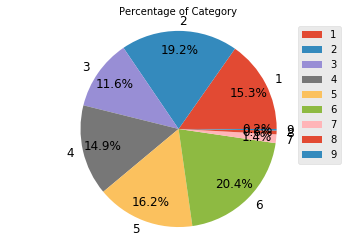

   stat percent
1    59   14.8%
2    74   18.5%
3    45   11.2%
4    52   13.0%
5    62   15.5%
6    98   24.5%
7     5    1.2%
8     3    0.8%
9     2    0.5%


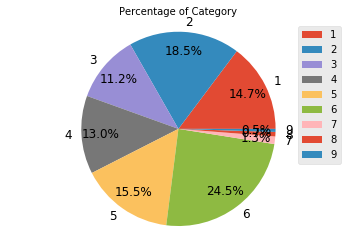

In [71]:
#查看測試資料和訓練資料的分布
value_accu(train,"類別")
value_accu(test,"類別")

In [72]:
trainTx = train['Text']
trainLabel = train["財政"]
trainCatLabel = train["類別"]
testTx = test["Text"]
testLabel = test["財政"]
testCatLabel = test["類別"]

In [65]:
trainTx[:3]

0    造成 髒 亂 方便 影響 居民 生活品質 下一張 這是 大型 公園 屬於 苗圃 用地 剛說 ...
1    地方 這是 原民會 一個 工程 地方 施作 地方 原住民 事務 委員會 范 主任委員 織欽 ...
3    公園 處理 工務局 長 主席 許議長崑源 工務局 長 請答 覆 工務局 吳 局長 宏課 現在...
Name: Text, dtype: object

In [50]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#data_path = r"D:\python_kcc\code_from_O\Data\\"
csvIn = open(data_path+"2-CIS150_Only3rd_Seg.csv", 'r', newline='', encoding='utf-8-sig')
rowlists = csv.reader(csvIn)

In [66]:
trnCunt = 0
tsCunt = 0
trainTx = []
trainLabel = []
trainCatLabel = []
testTx = []
testLabel = []
testCatLabel = []
for row in rowlists:
    print(row[0]+": "+ row[1]+": "+row[2])
   # print("================================================")
    if (row[1] == "1" or row[1] == "0") and trnCunt < 1500:
        trainCatLabel.append(int(row[0]))
        trainLabel.append(int(row[1]))
        trainTx.append(row[2])
        trnCunt += 1
    elif (row[1] == "1" or row[1] == "0") and tsCunt < 500:
        testCatLabel.append(int(row[0])) 
        testLabel.append(int(row[1]))
        testTx.append(row[2])
        tsCunt += 1
    if trnCunt > 1499 and tsCunt > 499 :
        break
csvIn.close()

ValueError: I/O operation on closed file.

In [73]:
trainTx[:2]

0    造成 髒 亂 方便 影響 居民 生活品質 下一張 這是 大型 公園 屬於 苗圃 用地 剛說 ...
1    地方 這是 原民會 一個 工程 地方 施作 地方 原住民 事務 委員會 范 主任委員 織欽 ...
Name: Text, dtype: object

In [52]:
token = Tokenizer()
token.fit_on_texts(trainTx)
vocab_size = len(token.word_index) + 1

In [76]:
token.word_counts

OrderedDict([('造成', 43),
             ('髒', 11),
             ('亂', 14),
             ('方便', 15),
             ('影響', 48),
             ('居民', 39),
             ('生活品質', 6),
             ('下一張', 8),
             ('這是', 249),
             ('大型', 11),
             ('公園', 71),
             ('屬於', 35),
             ('苗圃', 6),
             ('用地', 22),
             ('剛說', 1),
             ('做為', 24),
             ('綠化', 5),
             ('多人', 5),
             ('居住', 14),
             ('地方', 274),
             ('任由', 4),
             ('荒涼', 1),
             ('雜草叢生', 3),
             ('環境衛生', 3),
             ('變成', 69),
             ('疫情', 4),
             ('孳生地', 1),
             ('是不是', 228),
             ('優先', 23),
             ('開發', 45),
             ('本席', 149),
             ('所知', 3),
             ('已經', 256),
             ('編列', 25),
             ('000', 88),
             ('萬元', 35),
             ('預算', 75),
             ('先', 68),
             ('興建', 47),
             ('後續', 11),
 

In [74]:
print("Total document_count = ", token.document_count)
print("vocab_size = ", vocab_size)
print("==============  texts_to_sequences  ===========================")

x_train_seq = token.texts_to_sequences(trainTx)
x_test_seq = token.texts_to_sequences(testTx)
#print("trainTx[10] = ",trainTx[10]) #不能用10，因為不一定會抽到index為10的資料
print("trainTx[:2] = \n",trainTx[:2])
print("")
#print("x_train_seq[10] = ",x_train_seq[10])
print("x_train_seq[:2] = \n",x_train_seq[:2])
print("===============  pad_sequences  ==============================")

max_length = 50

x_train = sequence.pad_sequences(x_train_seq, maxlen=max_length, padding='post')
#print("x_train[10] = ",x_train[10])
print("x_train[:2] = \n",x_train[:2])
print("")
x_test = sequence.pad_sequences(x_test_seq, maxlen=max_length, padding='post')
#print("x_test[10] = ",x_test[10])
print("x_test[:2] = \n",x_test[:2])
print("================================================")

Total document_count =  1500
vocab_size =  12005
==============  texts_to_sequences  ===========================
trainTx[:2] = 
 0    造成 髒 亂 方便 影響 居民 生活品質 下一張 這是 大型 公園 屬於 苗圃 用地 剛說 ...
1    地方 這是 原民會 一個 工程 地方 施作 地方 原住民 事務 委員會 范 主任委員 織欽 ...
Name: Text, dtype: object

x_train_seq[:2] = 
 [[205, 977, 760, 709, 184, 236, 1619, 1291, 20, 978, 114, 279, 1620, 452, 5475, 415, 1873, 1620, 452, 1874, 761, 15, 2230, 5476, 2744, 184, 2745, 122, 2231, 5477, 23, 427, 197, 35, 2746, 18, 403, 80, 280, 105, 126, 188, 1620, 979, 12, 21, 47], [15, 20, 428, 4, 149, 15, 1455, 15, 194, 896, 325, 980, 827, 1621, 2232, 15, 429, 130, 1292, 1293, 1875, 1876, 1877, 1, 137, 5478, 5479, 337, 1878, 710, 428, 134, 3651, 61, 65, 415, 3652, 5480, 218, 416, 2747, 1879, 149, 5481, 5482, 15, 9, 180, 762]]
===============  pad_sequences  ==============================
x_train[:2] = 
 [[ 205  977  760  709  184  236 1619 1291   20  978  114  279 1620  452
  5475  415 1873 1620  452 1874  761   15 2230 5476 2744  184 2745  

# 處理Y

In [13]:
#keras原本的to_categorical會把資料轉成  [0 ~ 輸入資料最大值]的one-hot陣列
#導致one-hot-encoding結果多一維，變成0~9
#調整程式讓資料可以轉1~9
def to_categorical(y, num_classes=None, dtype='float32'):
    """Converts a class vector (integers) to binary class matrix.
    E.g. for use with categorical_crossentropy.
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
        dtype: The data type expected by the input, as a string
            (`float32`, `float64`, `int32`...)
    # Returns
        A binary matrix representation of the input. The classes axis
        is placed last.
    # Example
    ```python
    # Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
    > labels
    array([0, 2, 1, 2, 0])
    # `to_categorical` converts this into a matrix with as many
    # columns as there are classes. The number of rows
    # stays the same.
    > to_categorical(labels)
    array([[ 1.,  0.,  0.],
           [ 0.,  0.,  1.],
           [ 0.,  1.,  0.],
           [ 0.,  0.,  1.],
           [ 1.,  0.,  0.]], dtype=float32)
    ```
    """

    y = np.array(y, dtype='int')
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y-1] = 1 #CY:改成(y-1)，處理多一維度的問題
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

In [14]:
#將Y轉乘binary形式
label_num = len(list(set(trainCatLabel)))
#待解：應該壓成9維，但被變成10維
#已解：修改to_categorical function (108.06.03)
y_train_binary = to_categorical(trainCatLabel,num_classes = label_num)
y_test_binary = to_categorical(testCatLabel,num_classes = label_num)

In [15]:
print("原始訓練目標:\n{train_ori} \n二元化後訓練目標:\n{train_bin}\n".format(train_ori=trainCatLabel[1300:1310],train_bin=y_train_binary[1300:1310]))
print("原始測試目標:\n{test_ori} \n二元化後測試目標:\n{test_bin}\n".format(test_ori=testCatLabel[50:60],test_bin=y_test_binary[50:60]))

原始訓練目標:
1626    1
1627    2
1628    2
1629    2
1630    4
1631    5
1633    6
1635    4
1636    4
1637    3
Name: 類別, dtype: int64 
二元化後訓練目標:
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]]

原始測試目標:
247    6
251    6
253    6
256    6
259    1
267    2
270    3
271    5
277    2
279    5
Name: 類別, dtype: int64 
二元化後測試目標:
[[0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]



# 設置模型

In [54]:
# load the whole embedding into memory 
embeddings_index = dict() 
f = open(data_path+"3-CISWord2Vec-300.txt", encoding='utf8') 
for line in f: 
    values = line.split() 
    word = values[0] 
    coefs = asarray(values[1:], dtype='float32') 
    embeddings_index[word] = coefs
f.close() 
print('Loaded %s word vectors.' % len(embeddings_index)) 

# create a weight matrix for words in training docs 
embedding_matrix = zeros((vocab_size, 300)) 
for word, i in token.word_index.items(): 
    embedding_vector = embeddings_index.get(word) 
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector

Loaded 29706 word vectors.


In [55]:
# define model 
model = Sequential() 
r_l1 = 0.01
r_l2 = 0.001

e = Embedding(output_dim=300, input_dim=vocab_size, weights=[embedding_matrix], input_length=max_length, trainable=False) 
model.add(e) 
#model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(SimpleRNN(units=16))

model.add(Bidirectional(LSTM(64, 
                             return_sequences=True, 
                             dropout=0.25, 
                             #recurrent_dropout= 0.1,
                             #kernel_regularizer = regularizers.l1_l2(l1= r_l1,
                                                                     #l2 = r_l2
                                                                    )))
model.add(LSTM(10,
               return_sequences=True,
               activation='relu'
               #kernel_regularizer= regularizers.l1_l2(l1= r_l1,l2 = r_l2)
              ))
model.add(GlobalMaxPool1D())
######
#model.add(Bidirectional(LSTM(64, dropout=0.25, recurrent_dropout=0.1)))
######



model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(units=label_num,activation='softmax'))
model.add(Dense(label_num, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.save_weights('model.h5') #compile 完先儲存初始化的權重

print("summarize the model")
print(model.summary())

summarize the model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 300)           3601500   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 128)           186880    
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 10)            5560      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2816      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 2

In [31]:
#二元類別
#train_history = model.fit(x_train, trainLabel, batch_size=64, epochs=20, verbose=2, validation_split=0.2)
#多類別，共9類
earlystop_monitor = EarlyStopping(patience=8)
train_history = model.fit(x_train, y_train_binary, batch_size=64, epochs=50,
                          callbacks=[earlystop_monitor],
                          verbose=2, validation_split=0.2)
model.load_weights('model.h5') #fit model 後載入初始化的權重，避免使用到訓練後的權重

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 1280 samples, validate on 320 samples
Epoch 1/50
 - 5s - loss: 2.0024 - categorical_accuracy: 0.2055 - val_loss: 1.8718 - val_categorical_accuracy: 0.2094
Epoch 2/50
 - 2s - loss: 1.7848 - categorical_accuracy: 0.2797 - val_loss: 1.7583 - val_categorical_accuracy: 0.3438
Epoch 3/50
 - 2s - loss: 1.5848 - categorical_accuracy: 0.4180 - val_loss: 1.5839 - val_categorical_accuracy: 0.4938
Epoch 4/50
 - 2s - loss: 1.4331 - categorical_accuracy: 0.4914 - val_loss: 1.4697 - val_categorical_accuracy: 0.5375
Epoch 5/50
 - 2s - loss: 1.2841 - categorical_accuracy: 0.5578 - val_loss: 1.4526 - val_categorical_accuracy: 0.5406
Epoch 6/50
 - 2s - loss: 1.1827 - categorical_accuracy: 0.6016 - val_loss: 1.4606 - val_categorical_accuracy: 0.5281
Epoch 7/50
 - 2s - loss: 1.1341 - categorical_accuracy: 0.6141 - val_loss: 1.4808 - val_categorical_accuracy: 0.5469
Epoch 8/

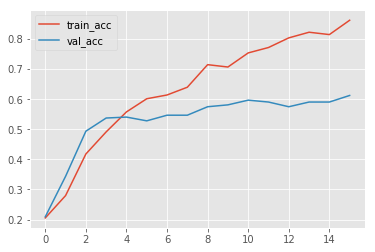

400/400 [==============================] - 0s 588us/step
Accuracy: 13.750000


In [32]:
pyplot.plot(train_history.history['categorical_accuracy'], label='train_acc')
pyplot.plot(train_history.history['val_categorical_accuracy'], label='val_acc')
pyplot.legend()
pyplot.show()
accuracy = model.evaluate(x_test,y_test_binary,verbose=1) 
print('Accuracy: %f' % (accuracy[1] * 100))

In [40]:
predict_train = model.predict_classes(x_train)
predictClass_train = list(predict_train.reshape(-1))

# [250:260] = 100 %
intStart = 350
intEnd = 360
predictClass_train[intStart:intEnd]

for i in range(intStart,intEnd):
    if i in list(testTx.index): 
        print("-------------------------------------")
        print("testTx[ %d ] = " %i , testTx[i])
        print("testCatLabel[ %d ] = " %i , testCatLabel[i])
print("testCatLabel = ", testCatLabel[intStart:intEnd])
print("predictClass =",predictClass_train[intStart:intEnd])


-------------------------------------
testTx[ 352 ] =  優勢 高雄 來辦 獎勵 旅遊 大型 國際 會議 實力 夠 超越 周邊 城市 輸 信心 包括 剛剛 舉的 安麗 旅遊 獎勵 旅遊 高雄 國際 春天 藝術節 類似 大型 國際 會議 真正 挑戰 專業展 B2B 專業展 B2C 消費 展 遊艇 展是 一半 專業 一半 消費
testCatLabel[ 352 ] =  2
-------------------------------------
testTx[ 356 ] =  當作 選舉 造勢 活動 蕭永達 需要 萬 炒作 成 政治事件 沒開 一直 現在 會期 月 27 日 市長 接受 質詢 拿出 放 一年 不講 最近 突然 講 最近 賣票 拿出 月 20 日首
testCatLabel[ 356 ] =  3
-------------------------------------
testTx[ 358 ] =  看法 尤其 地方 上面 請 蔡 議員 蔡 議員 金晏先 市長 報告 剛剛 提到 世運 主場 館 高雄市 場館 處於 閒置 狀態 世運 主場 館 簡單 辦 田徑賽 辦 足球賽 辦 棒球賽 好像 不行 相信 市政府 最近 接到 許多 市民 朋友 意見 足球 愛好者
testCatLabel[ 358 ] =  3
-------------------------------------
testTx[ 359 ] =  知道 一年 有個 財政 計畫 針對 所有 負債 每年 要編 90 億來還 負債 部分 知道 錢 一部分 又還 回去 借錢 負債 現在 方法 樣子 好 方法 市長 應該 反歸 回來 剛剛 所講 思考
testCatLabel[ 359 ] =  2
testCatLabel =  1768    2
1771    5
1779    2
1781    6
1782    6
1785    2
1786    2
1789    4
1823    2
1825    1
Name: 類別, dtype: int64
predictClass = [0, 3, 0, 0, 0, 1, 0, 0, 0, 0]


In [114]:
#  print('Accuracy[0]: %f' % (accuracy[0] * 100))
print('Accuracy: %f' % (accuracy[1] * 100))

predict = model.predict_classes(x_test)
predictClass = list(predict.reshape(-1))

# [250:260] = 100 %
intStart = 350
intEnd = 360
predictClass[intStart:intEnd]

for i in range(intStart,intEnd):
    print("-------------------------------------")
    print("testTx[ %d ] = " %i , testTx[i])
    print("testCatLabel[ %d ] = " %i , testCatLabel[i])
print("testCatLabel = ", testCatLabel[intStart:intEnd])
print("predictClass =",predictClass[intStart:intEnd])

ipStr1 = "市長 南漂 92 年 回來 高雄 現在 覺得 認識 高雄 了解 高雄 當我 看到 數據 嚇一 跳 是否是 認識 高雄 看到 真的 "
ipStr1 += "震撼 這張 圖待會 做 報告 現在 月 現在 多起 相信 新聞 登 兒虐 事件 發生 直接 上網 主計 總處 統計 網"
# ipStr2 = "委外 背景 已經 不在 業務 精簡 委外 減少 人 事 開支 這是 一項 建議 第二件 事情 是關 財政 事情 特別 "
# ipStr2 += "市長 報告 財政 數據 想像 有點 不一樣 公布 財政 負債 裡面 財政局 業務 報告 時 提出 民間 版 質詢 之前 我要 市長"
ipStr2 = "最好 做到 一定 剩餘 起碼 平衡 再 赤字 再 公債 賒借 一直 往上 歲入 就要 評估 平衡 當年度 財務 就要 當年度 "
ipStr2 += "解決 賒借 解決 不夠 部分 永續 財政 針對 非 公用 土地 平均地權 基金 抵費 出售 現在 暫緩 去年 108 年 預算 市 長編"

str1Seg = token.texts_to_sequences([ipStr2])
str1Pad = sequence.pad_sequences(str1Seg, maxlen=max_length, padding='post')
predOut = model.predict_classes(str1Pad)
print("predOut = ", predOut[0]) 

Accuracy: 58.116233
-------------------------------------
testTx[ 350 ] =  再來 談長 2.0 政策 落實 部分 之前 幾位 議員 開 公聽會 長 2.0 政策 落實 需要 配套 包括 照服員 社區 相關 配合 今年 月 全 台灣 65 歲 以上 人口 超過 300 萬人全 台灣 65 歲 以上 人口 高達 12 預計 2026 年 450
testCatLabel[ 350 ] =  5
-------------------------------------
testTx[ 351 ] =  右邊 張圖 311 核災 一些 被害 地區 尤其 紅色 黑色 地方 最 嚴重 包括 這次 中央政府 打算 開放 福島 以外 縣市 包括 黑色 下面 木 右邊 茨城 最 右下角 千葉 群馬 縣市 這次 福島 核災 所測 相關 輻射量 紅色 地方 相對 嚴重
testCatLabel[ 351 ] =  9
-------------------------------------
testTx[ 352 ] =  地政局 資料 各地 地政局 提供 資料 一些 房地產 研究 中心 做 研究 2016 年 月 去年同期 交易量 年減 8.3 2016 年 月 數據 誇張 2015 年 月 比較 少 36.2 漲 每一個 月 減少 通常 呈現 大幅 減少 這就 表示 房市 萎縮 先請
testCatLabel[ 352 ] =  6
-------------------------------------
testTx[ 353 ] =  杉林區 石化 污染 一區 個區 做 比較 藍色 103 年 紅色 104 年 現在 林園區 高居 高雄市 榜首 肺癌 氣管 支氣管 癌 標準化 死亡率 部分 104 年度 去年 林園區 37.6 103 年度 36.6 寮 高 整個 石化工業 區都 高
testCatLabel[ 353 ] =  5
-------------------------------------
testTx[ 354 ] =  林園 橘線 延伸 捷運路線 小港 紅線 紅線 停 差 11 公里 橘線 寮 停 寮 林園 11 公里 二條 線 串連 之後 橘線 紅線 小港 林園 寮 周邊 辦法

# 嘗試clustering

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [94]:
true_k = 9
model_km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)


In [97]:
model_km.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=9, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [101]:
clusters = model_km.labels_.tolist()

In [105]:
testTx

4       開通 紓解 交通 交通 阻塞 大社 仁武 高速公路 紓解 主要 那條 道路 帶動 大社 仁武...
6       知道 2025 年 這種 目標 每個 城市 情境 條件 情境 是因為 重工業 煉鋼廠 發電廠...
10      大大的 增加 也就是說 前 鎮 小港 縣市合併 後 期待 請 下 一張 市政府 表現 風貌 ...
12      外縣市 買 乾淨 空氣污染 高雄市 金門馬祖 買 碳權 污染 卻 高雄 回饋 金往 金門馬祖...
19      照像 通報 做 處理 1999 用電 話 聯 繫 樣 用電 話 一個 照片 回報 處理 李 ...
27      雄 縣政府 編列 000 萬左右 預算 制法 後 中央 農路 補助 民國 94 年 制法 後...
30      蓮池潭 放在 裡面 李 議員 眉萎 說 蓮池潭 放在 38 裡面 38 裡面 茂林 紫蝶 幽...
36      急 避難 包 消防局 長 消防局 陳 局長 虹龍 安全 事項 嫌多 應該 準備 康議員裕成 ...
39      一個 展示 平台 如此而已 高雄市政府 應該 積極主動 方式 藉由 平台 孩子 畢業 之後 ...
43      結合 這是 未來 長期 路網 中 這一 條線 林園 一條線 再 接到 臨海 工業區 一站 這...
52      循序漸進 這是 長年 累積下來 東西 處理 曾議員麗燕 好 知道 做 改進 時間 有限 主席...
59      國道 號 前 陣子 有人 建議 部分 知道 國道 10 號 目前 預留 一個 匝道 口 未來...
61      主 人權會 一部 電影 就要 一個 局處 裁撤 一部 電影 審 預算 天天 流會 城市 受到...
65      92 年 月 14 日 發 處理 處理 當時 質詢 市長 責成 姚 高橋 副市長 說 副市長...
67      重建 工程 最 重要 道路 部分 土石 地質 穩定 敏感 的關 係 道路 工程 交通部 公路...
68      一定 租給 強制 收回 鄭 議員 新助 公文 手上 這是 幾天 發出 公文 副本 寄給 公門...
70      原住民 預算 比其 縣市 少 代表 原住民 抗議 原住民 事務 委員會 范 主任委員 織欽 ...
73      員 武忠 好

In [98]:
x_train.shape

(1600, 50)

In [96]:
type(x_train_seq),type(x_train)

(list, numpy.ndarray)

In [85]:
def object_content(objects):
    for obj in objects:
        print(type(obj),np.array(obj).shape)

In [86]:
object_content([x_train_seq,x_train])

<class 'list'> (1600,)
<class 'numpy.ndarray'> (1600, 50)


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")

 

Top terms per cluster:


In [92]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

Cluster 0:
 climbing
 ninja
 cat
 extension
 chrome
 promoter
 key
 google
 came
 best
Cluster 1:
 google
 best
 map
 app
 feedback
 impressed
 incredible
 translate
 ve
 taken


Prediction
[1]
[0]


In [89]:
clusters = model.labels_.tolist()

In [90]:
clusters

[0, 0, 0, 0, 1, 1, 0, 0]